## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  18.377193  1065.417805  0.493744  10.465270  1.593530
1  80.020016   192.340923  0.683964   6.568064  0.886537
2  78.403682  1095.060249  0.371958   9.494901  1.457058
3  76.665935  1556.814309  0.182399   5.852300  1.347330
4  74.706236   491.237823  0.429691  10.256888  1.206519


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0562448	total: 65.6ms	remaining: 1m 5s
1:	learn: 1.0459021	total: 66.5ms	remaining: 33.2s
2:	learn: 1.0374266	total: 67.1ms	remaining: 22.3s
3:	learn: 1.0276253	total: 67.8ms	remaining: 16.9s
4:	learn: 1.0187472	total: 68.4ms	remaining: 13.6s
5:	learn: 1.0086164	total: 69.3ms	remaining: 11.5s


6:	learn: 0.9989705	total: 69.9ms	remaining: 9.91s
7:	learn: 0.9876461	total: 70.7ms	remaining: 8.77s
8:	learn: 0.9780428	total: 71.3ms	remaining: 7.85s
9:	learn: 0.9679791	total: 71.9ms	remaining: 7.12s
10:	learn: 0.9588615	total: 72.9ms	remaining: 6.55s
11:	learn: 0.9481963	total: 73.5ms	remaining: 6.05s
12:	learn: 0.9395729	total: 74.2ms	remaining: 5.63s
13:	learn: 0.9321138	total: 74.8ms	remaining: 5.27s
14:	learn: 0.9215566	total: 75.4ms	remaining: 4.95s
15:	learn: 0.9141073	total: 75.9ms	remaining: 4.67s
16:	learn: 0.9064963	total: 76.5ms	remaining: 4.42s
17:	learn: 0.8980715	total: 77.1ms	remaining: 4.21s
18:	learn: 0.8907978	total: 77.6ms	remaining: 4.01s
19:	learn: 0.8806389	total: 78.1ms	remaining: 3.83s
20:	learn: 0.8714990	total: 78.6ms	remaining: 3.67s
21:	learn: 0.8638272	total: 79.2ms	remaining: 3.52s
22:	learn: 0.8559798	total: 79.8ms	remaining: 3.39s
23:	learn: 0.8492351	total: 80.3ms	remaining: 3.27s
24:	learn: 0.8422145	total: 80.9ms	remaining: 3.15s
25:	learn: 0.835

196:	learn: 0.2768786	total: 163ms	remaining: 666ms
197:	learn: 0.2755775	total: 164ms	remaining: 665ms
198:	learn: 0.2742530	total: 165ms	remaining: 663ms
199:	learn: 0.2724322	total: 165ms	remaining: 660ms
200:	learn: 0.2713656	total: 166ms	remaining: 658ms
201:	learn: 0.2701513	total: 166ms	remaining: 656ms
202:	learn: 0.2684638	total: 167ms	remaining: 654ms
203:	learn: 0.2671887	total: 167ms	remaining: 652ms
204:	learn: 0.2659802	total: 168ms	remaining: 650ms
205:	learn: 0.2646756	total: 168ms	remaining: 647ms
206:	learn: 0.2631109	total: 168ms	remaining: 645ms
207:	learn: 0.2616650	total: 169ms	remaining: 643ms
208:	learn: 0.2606369	total: 169ms	remaining: 641ms
209:	learn: 0.2597405	total: 170ms	remaining: 639ms
210:	learn: 0.2588430	total: 170ms	remaining: 636ms
211:	learn: 0.2577152	total: 170ms	remaining: 634ms
212:	learn: 0.2565138	total: 171ms	remaining: 632ms
213:	learn: 0.2555423	total: 171ms	remaining: 630ms
214:	learn: 0.2542509	total: 172ms	remaining: 628ms
215:	learn: 

353:	learn: 0.1462416	total: 232ms	remaining: 424ms
354:	learn: 0.1457142	total: 233ms	remaining: 424ms
355:	learn: 0.1451997	total: 234ms	remaining: 423ms
356:	learn: 0.1447403	total: 234ms	remaining: 422ms
357:	learn: 0.1439473	total: 235ms	remaining: 422ms
358:	learn: 0.1434508	total: 236ms	remaining: 421ms
359:	learn: 0.1428976	total: 236ms	remaining: 420ms
360:	learn: 0.1426490	total: 236ms	remaining: 418ms
361:	learn: 0.1422117	total: 237ms	remaining: 418ms
362:	learn: 0.1414467	total: 237ms	remaining: 416ms
363:	learn: 0.1412074	total: 238ms	remaining: 415ms
364:	learn: 0.1406776	total: 238ms	remaining: 414ms
365:	learn: 0.1402144	total: 238ms	remaining: 413ms
366:	learn: 0.1394734	total: 239ms	remaining: 412ms
367:	learn: 0.1389646	total: 239ms	remaining: 411ms
368:	learn: 0.1385936	total: 240ms	remaining: 410ms
369:	learn: 0.1380983	total: 240ms	remaining: 409ms
370:	learn: 0.1378707	total: 241ms	remaining: 408ms
371:	learn: 0.1375124	total: 241ms	remaining: 407ms
372:	learn: 

574:	learn: 0.0747187	total: 330ms	remaining: 244ms
575:	learn: 0.0746154	total: 331ms	remaining: 244ms
576:	learn: 0.0743423	total: 332ms	remaining: 243ms
577:	learn: 0.0740111	total: 332ms	remaining: 242ms
578:	learn: 0.0739107	total: 332ms	remaining: 242ms
579:	learn: 0.0735878	total: 333ms	remaining: 241ms
580:	learn: 0.0734897	total: 333ms	remaining: 240ms
581:	learn: 0.0731162	total: 334ms	remaining: 240ms
582:	learn: 0.0729905	total: 334ms	remaining: 239ms
583:	learn: 0.0728945	total: 334ms	remaining: 238ms
584:	learn: 0.0727998	total: 335ms	remaining: 238ms
585:	learn: 0.0725397	total: 335ms	remaining: 237ms
586:	learn: 0.0724162	total: 336ms	remaining: 236ms
587:	learn: 0.0723231	total: 337ms	remaining: 236ms
588:	learn: 0.0722016	total: 338ms	remaining: 236ms
589:	learn: 0.0721097	total: 338ms	remaining: 235ms
590:	learn: 0.0717181	total: 339ms	remaining: 234ms
591:	learn: 0.0713712	total: 339ms	remaining: 234ms
592:	learn: 0.0712524	total: 340ms	remaining: 233ms
593:	learn: 

725:	learn: 0.0489567	total: 394ms	remaining: 149ms
726:	learn: 0.0487608	total: 395ms	remaining: 148ms
727:	learn: 0.0487046	total: 396ms	remaining: 148ms
728:	learn: 0.0485778	total: 396ms	remaining: 147ms
729:	learn: 0.0485225	total: 397ms	remaining: 147ms
730:	learn: 0.0484148	total: 397ms	remaining: 146ms
731:	learn: 0.0483602	total: 397ms	remaining: 146ms
732:	learn: 0.0482110	total: 398ms	remaining: 145ms
733:	learn: 0.0481585	total: 398ms	remaining: 144ms
734:	learn: 0.0481051	total: 399ms	remaining: 144ms
735:	learn: 0.0479829	total: 399ms	remaining: 143ms
736:	learn: 0.0479315	total: 399ms	remaining: 143ms
737:	learn: 0.0477582	total: 400ms	remaining: 142ms
738:	learn: 0.0477061	total: 400ms	remaining: 141ms
739:	learn: 0.0476560	total: 401ms	remaining: 141ms
740:	learn: 0.0474863	total: 401ms	remaining: 140ms
741:	learn: 0.0474459	total: 402ms	remaining: 140ms
742:	learn: 0.0474061	total: 402ms	remaining: 139ms
743:	learn: 0.0472884	total: 402ms	remaining: 138ms
744:	learn: 

957:	learn: 0.0256743	total: 491ms	remaining: 21.5ms
958:	learn: 0.0255737	total: 492ms	remaining: 21ms
959:	learn: 0.0255073	total: 492ms	remaining: 20.5ms
960:	learn: 0.0254148	total: 493ms	remaining: 20ms
961:	learn: 0.0253011	total: 494ms	remaining: 19.5ms
962:	learn: 0.0252111	total: 494ms	remaining: 19ms
963:	learn: 0.0251470	total: 494ms	remaining: 18.5ms
964:	learn: 0.0250812	total: 495ms	remaining: 17.9ms
965:	learn: 0.0250340	total: 495ms	remaining: 17.4ms
966:	learn: 0.0249578	total: 496ms	remaining: 16.9ms
967:	learn: 0.0248702	total: 496ms	remaining: 16.4ms
968:	learn: 0.0248092	total: 497ms	remaining: 15.9ms
969:	learn: 0.0247454	total: 497ms	remaining: 15.4ms
970:	learn: 0.0246711	total: 497ms	remaining: 14.9ms
971:	learn: 0.0246088	total: 498ms	remaining: 14.3ms
972:	learn: 0.0245477	total: 498ms	remaining: 13.8ms
973:	learn: 0.0244545	total: 499ms	remaining: 13.3ms
974:	learn: 0.0243294	total: 499ms	remaining: 12.8ms
975:	learn: 0.0242515	total: 499ms	remaining: 12.3ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3047607917396322


ABC Pre-generator MAE 0.8737516046638397


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

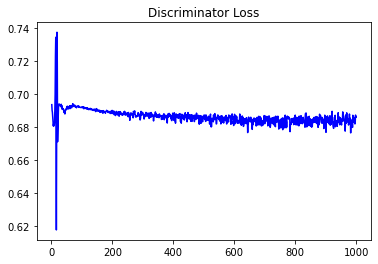

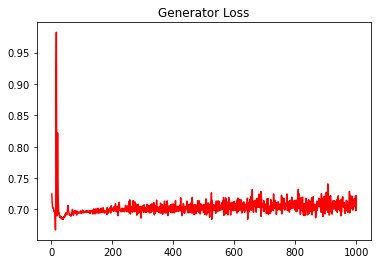

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3263633595686406


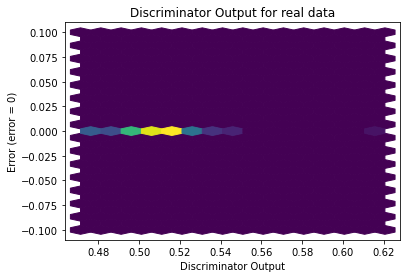

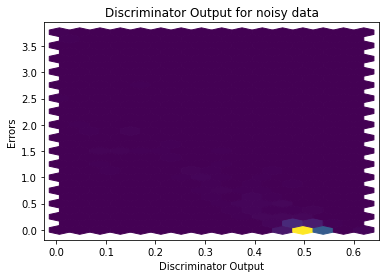

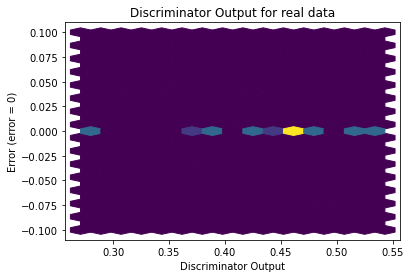

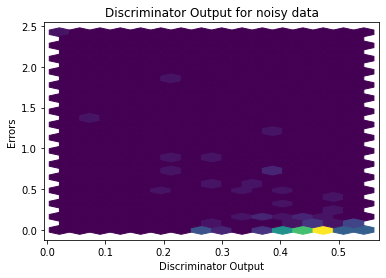

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

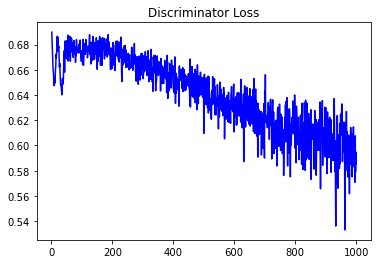

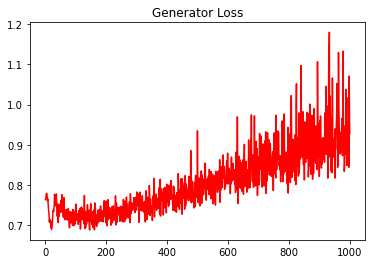

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.34542179593816397


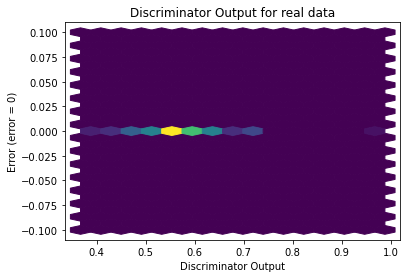

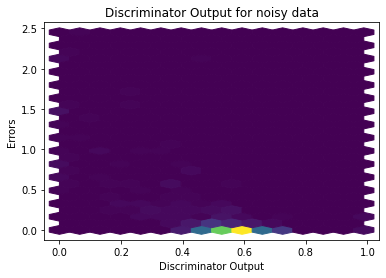

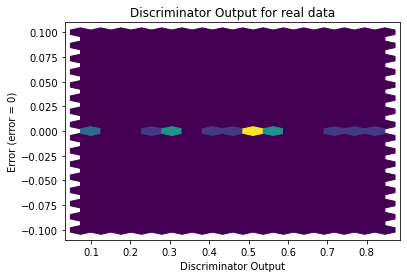

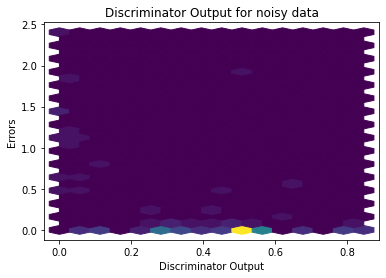

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


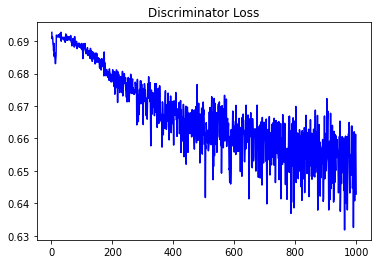

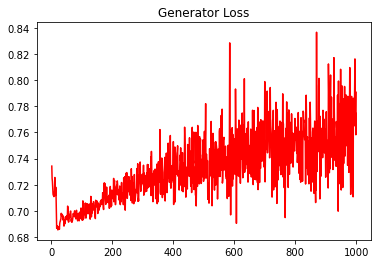

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.2573943153973669


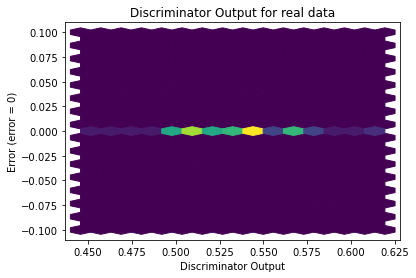

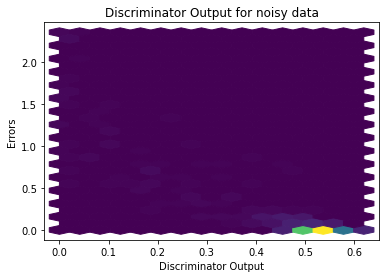

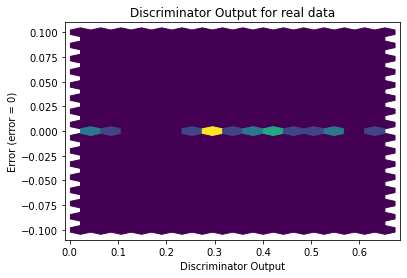

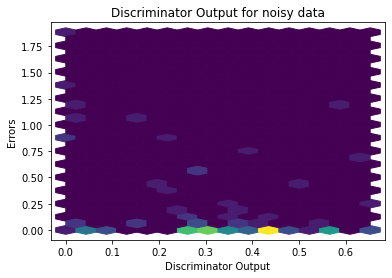

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


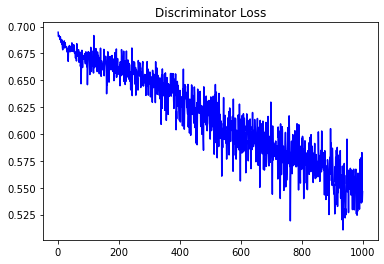

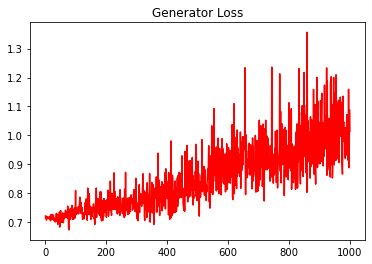

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.31193487591296437


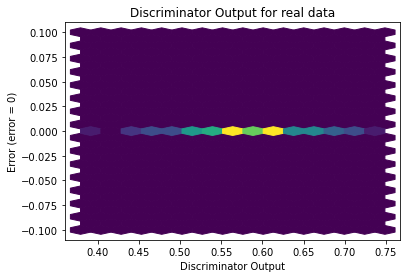

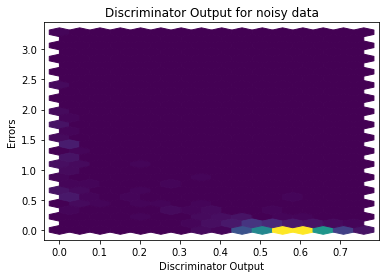

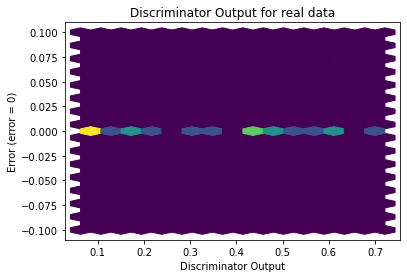

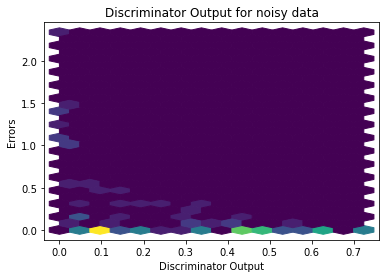

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1413]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5587]], requires_grad=True)
